# Plots for Presentation
## Data Sources
To make the netCDF files that are in data, download the CF netCDF for the bottle and ctd data at the 2025-10 CCHDO Snapshot: https://doi.org/10.6075/J0CCHMM1
Bottle: https://library.ucsd.edu/dc/object/bb2676719w/_5_1.zip/download
CTD: https://library.ucsd.edu/dc/object/bb2676719w/_13_1.zip/download
Note that due to some anti-AI scraping, the direct links might not work, or may only work in a browser

The bottle files should be unzipped into a `bottle` directory and the ctd files into a `ctd` directory (no subdirs, just the netcdf files).

## Requirements to run
* jupyterlab
* xarray
* netcdf4
* matplotlib
* cartopy
* requests

Note that it feels pretty inefficient at doing the data filtering, perhaps maybe it could be made better, but for presentation figure making, felt good enough.

In [1]:
import xarray as xr
from pathlib import Path
from datetime import date
import numpy as np
import requests as re

In [2]:
lats = []
lons = []
ctd_profiles = Path("data/ctd/")
for nc in ctd_profiles.glob("*.nc"):
    with xr.open_dataset(nc, decode_timedelta=False) as ds:
        lats.extend(ds.latitude)
        lons.extend(ds.longitude)

In [3]:
len(lats)

64289

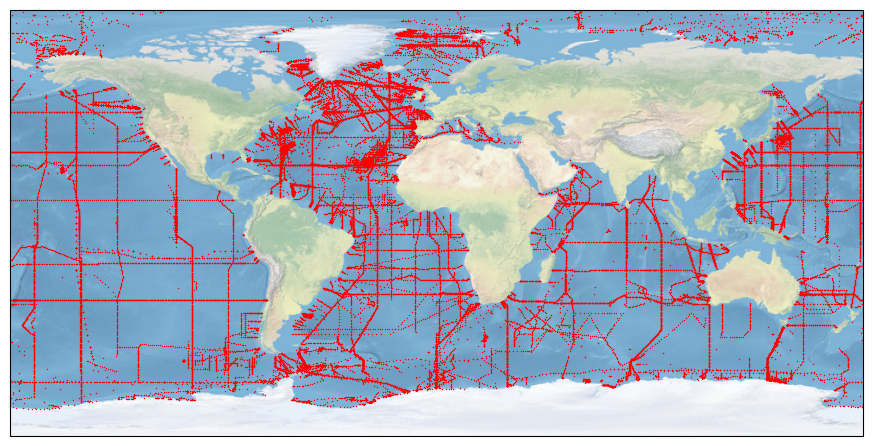

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, 'o', markersize=1, markeredgecolor="none", markerfacecolor='red')
ax.stock_img()
plt.savefig('ctd_profiles.pdf', bbox_inches='tight')
plt.savefig('ctd_profiles.svg', bbox_inches='tight')
plt.show()

In [5]:
recent_lats = []
recent_lons = []
ctd_profiles = Path("data/ctd/")
for nc in ctd_profiles.glob("*.nc"):
    with xr.open_dataset(nc, decode_timedelta=False) as ds:
        for _g, prof in ds.groupby("N_PROF"):
            if np.any(prof.time > np.datetime64("2024-10-24")):
                recent_lats.extend(prof.latitude)
                recent_lons.extend(prof.longitude)
len(recent_lats)

115

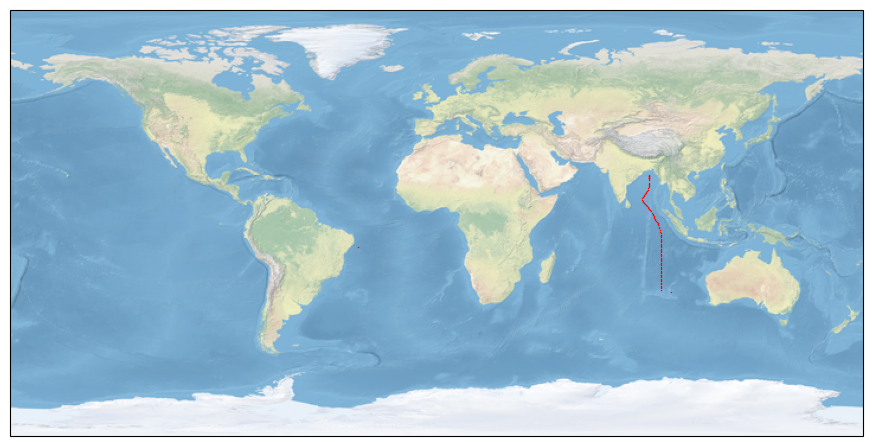

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(recent_lons, recent_lats, 'o', markersize=1, markeredgecolor="none", markerfacecolor='red')
ax.stock_img()
plt.savefig('recent_ctd_profiles.pdf', bbox_inches='tight')
plt.savefig('recent_ctd_profiles.svg', bbox_inches='tight')
plt.show()

In [7]:
files = re.get("https://cchdo.ucsd.edu/api/v1/file/all").json()

In [8]:
def filter_recent_updated_cf(meta):
    return meta["role"] == "dataset" and meta["data_format"] == "cf_netcdf" and meta["data_type"] == "ctd" and meta["file_mtime"] > "2024-10-24"

In [9]:
b = list(filter(filter_recent_updated_cf, files))

In [10]:
fnames = {fi["file_name"] for fi in b}

In [11]:
recent_up_lats = []
recent_up_lons = []
ctd_profiles = Path("data/ctd/")
for nc in ctd_profiles.glob("*.nc"):
    if nc.name not in fnames:
        continue
    with xr.open_dataset(nc, decode_timedelta=False) as ds:
        recent_up_lats.extend(ds.latitude)
        recent_up_lons.extend(ds.longitude)

In [12]:
len(recent_up_lats)

11840

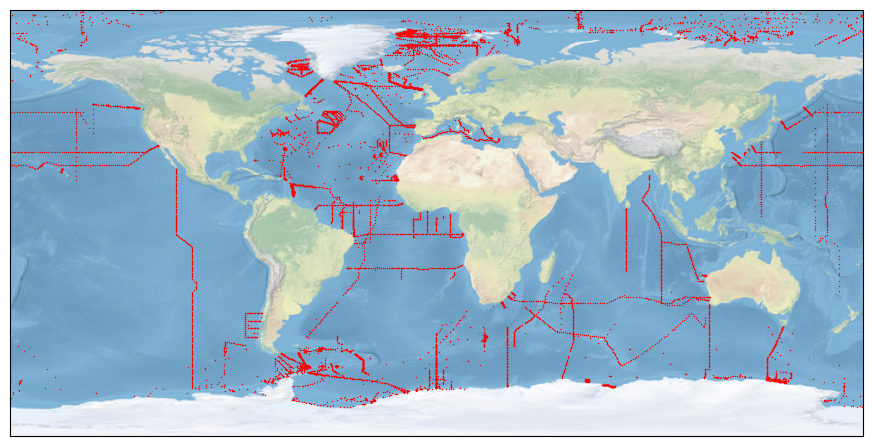

In [13]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(recent_up_lons, recent_up_lats, 'o', markersize=1, markeredgecolor="none", markerfacecolor='red')
ax.stock_img()
plt.savefig('recent_updated_ctd_profiles.pdf', bbox_inches='tight')
plt.savefig('recent_updated_ctd_profiles.svg', bbox_inches='tight')
plt.show()

In [14]:
deep_oxy_lats = []
deep_oxy_lons = []
ctd_profiles = Path("data/ctd/")
for nc in ctd_profiles.glob("*.nc"):
    with xr.open_dataset(nc, decode_timedelta=False) as ds:
        if "ctd_oxygen" not in ds:
            continue
        for _g, prof in ds.groupby("N_PROF"):
            mask = prof.pressure > 3000
            if np.any(mask) and np.any(np.isfinite(prof.ctd_oxygen.values[mask])):
                deep_oxy_lats.extend(prof.latitude)
                deep_oxy_lons.extend(prof.longitude)
len(deep_oxy_lats)

20486

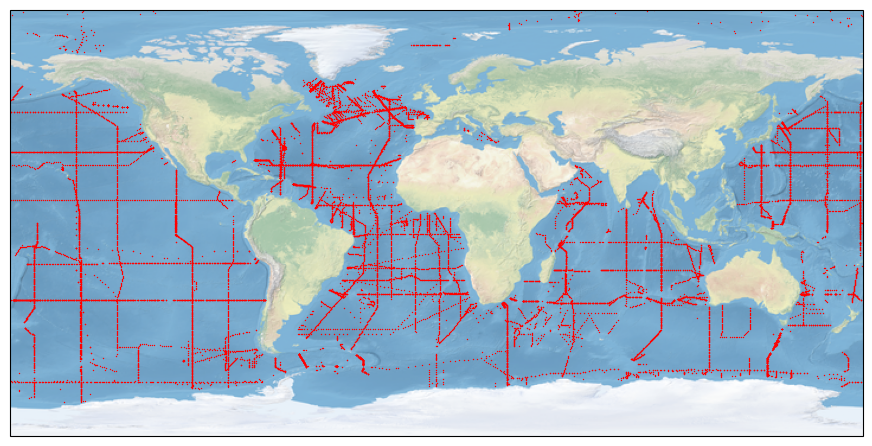

In [15]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(deep_oxy_lons, deep_oxy_lats, 'o', markersize=1, markeredgecolor="none", markerfacecolor='red')
ax.stock_img()
plt.savefig('deep_oxy_ctd_profiles.pdf', bbox_inches='tight')
plt.savefig('deep_oxy_ctd_profiles.svg', bbox_inches='tight')
plt.show()

In [16]:
bottle_nitrate_lats = []
bottle_nitrate_lons = []
total = 0
bottle_profiles = Path("data/bottle/")
for nc in bottle_profiles.glob("*.nc"):
    with xr.open_dataset(nc, decode_timedelta=False) as ds:
        total += ds.sizes["N_PROF"]
        if "nitrate" not in ds:
            continue
        for _g, prof in ds.groupby("N_PROF"):
            if np.any(np.isfinite(prof.nitrate)):
                bottle_nitrate_lats.extend(prof.latitude)
                bottle_nitrate_lons.extend(prof.longitude)
len(bottle_nitrate_lats)

42063

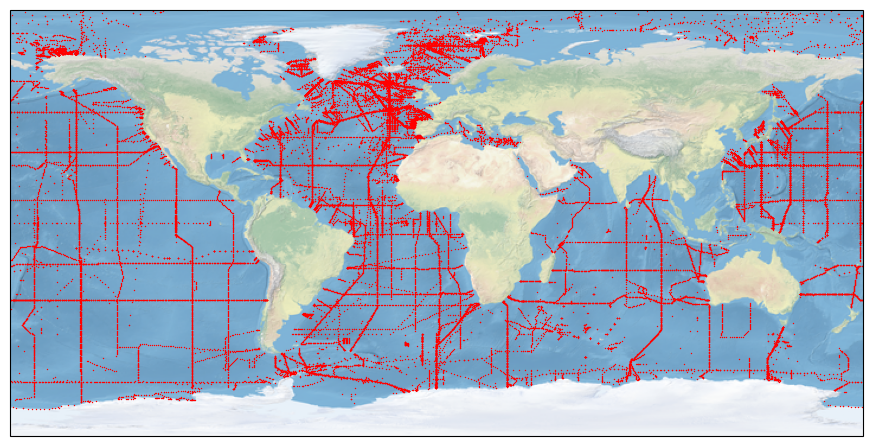

In [17]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(bottle_nitrate_lons, bottle_nitrate_lats, 'o', markersize=1, markeredgecolor="none", markerfacecolor='red')
ax.stock_img()
plt.savefig('nitrate_bottle_profiles.pdf', bbox_inches='tight')
plt.savefig('nitrate_bottle_profiles.svg', bbox_inches='tight')
plt.show()

In [18]:
len(bottle_nitrate_lats), total

(42063, 67931)

In [19]:
bottle_ph_total_lats = []
bottle_ph_total_lons = []
total = 0
bottle_profiles = Path("data/bottle/")
ph_names = {"ph_total_h_scale", "ph_unknown_scale", "ph_nbs", "ph_sws"}
for nc in bottle_profiles.glob("*.nc"):
    with xr.open_dataset(nc, decode_timedelta=False) as ds:
        if any(ph := (ds.keys() & ph_names)):
            for _g, prof in ds.groupby("N_PROF"):
                for ph_name in ph:
                    if np.any(np.isfinite(prof[ph_name])):
                        bottle_ph_total_lats.extend(prof.latitude)
                        bottle_ph_total_lons.extend(prof.longitude)
                        break
len(bottle_ph_total_lats)

14350

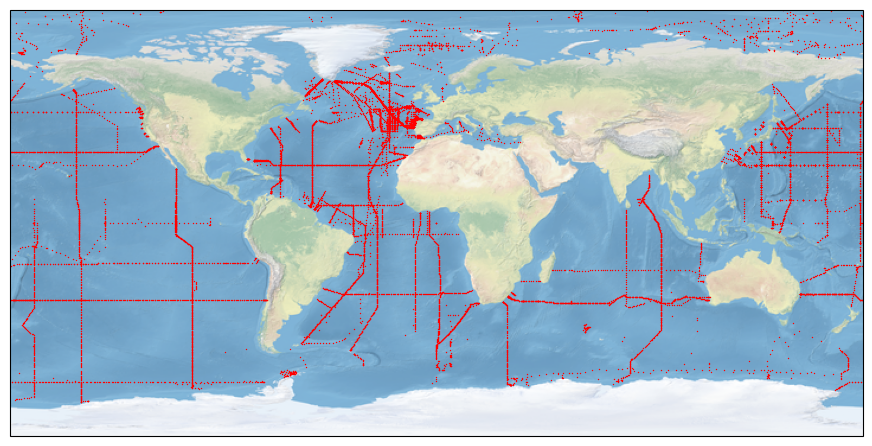

In [20]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(bottle_ph_total_lons, bottle_ph_total_lats, 'o', markersize=1, markeredgecolor="none", markerfacecolor='red')
ax.stock_img()
plt.savefig('ph_total_bottle_profiles.pdf', bbox_inches='tight')
plt.savefig('ph_total_bottle_profiles.svg', bbox_inches='tight')
plt.show()